In [1]:
import tensorflow as tf
# 데이터셋 불러오기(MNIST 손글씨이미지)
from tensorflow.keras import datasets

In [2]:
data = datasets.mnist
(train_x, train_y), (test_x, test_y) = data.load_data()


In [3]:
len(train_x)

60000

In [4]:
type(train_x)

numpy.ndarray

In [5]:
train_x.shape # 개수, 행, 열

(60000, 28, 28)

In [6]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

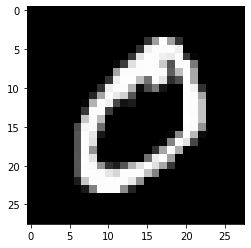

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_x[1], 'gray')
plt.show()

In [8]:
train_y[1]

0

In [9]:
test_x.shape

(10000, 28, 28)

In [10]:
'''
딥러닝은
학습시 학습데이터와 검증데이터를 같이 입력
epoch(학습횟수)마다 학습과 검증을 동시에 진행

train -> train, vaild
test
'''
# 검증데이터 분리
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, random_state=10)

In [12]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((45000, 28, 28), (15000, 28, 28), (45000,), (15000,))

In [13]:
# 모델 입력을 위해 차원 변경
# 스케일링(색상범위값 255로 나눠줌)
train_x = train_x.reshape(train_x.shape[0], 28*28)/255
valid_x = valid_x.reshape(valid_x.shape[0], 28*28)/255
test_x = test_x.reshape(test_x.shape[0], 28*28)/255

In [14]:
# label의 category값을 원핫인코딩형태로 변환
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
valid_y = to_categorical(valid_y)
test_y = to_categorical(test_y)

In [15]:
train_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [16]:
'''
모델 구현 방법
1. 시퀀셜
2. 클래스 상속
3. 함수형
'''
# 시퀀셜 방식으로 구현
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
# 모델 구현
model = Sequential()
# 활성화 함수(relu, sigmoid, tanh)
model.add(Dense(64, activation='relu', input_shape=(28*28, ))) # input layer

# 히든레이어 추가시(선택사항)---------
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
# ------------------------------------

model.add(Dense(10, activation='softmax')) # output layer

# 모델 설정
# 옵티마이저, 손실함수, 평가지표
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')
# 평가지표 - acc : 정확도(Accuracy)

# 학습
model.fit(train_x, train_y, epochs=10, validation_data=(valid_x, valid_y))

Epoch 1/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3565 - acc: 0.8929 - val_loss: 0.1814 - val_acc: 0.9479
Epoch 2/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1553 - acc: 0.9542 - val_loss: 0.1621 - val_acc: 0.9517
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1137 - acc: 0.9656 - val_loss: 0.1226 - val_acc: 0.9641
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0912 - acc: 0.9714 - val_loss: 0.1194 - val_acc: 0.9641
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0748 - acc: 0.9764 - val_loss: 0.1178 - val_acc: 0.9657
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0645 - acc: 0.9797 - val_loss: 0.1185 - val_acc: 0.9650
Epoch 7/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0549 - acc: 0.9828 - val_loss: 0.1197 - val_acc: 0.9655
Epoch 8/10
1407/1407 [==============================] - 2s 1ms

In [21]:
# 테스트데이터로 검증(평가)
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 757us/step - loss: 0.1138 - acc: 0.9709


[0.11383494734764099, 0.9708999991416931]

In [24]:
# 활성화 함수 비교
for f in ['sigmoid', 'tanh', 'relu'] :
    # 모델 구현
    model = Sequential()
    # 활성화 함수(relu, sigmoid, tanh)
    model.add(Dense(64, activation=f, input_shape=(28*28, ))) # input layer

    # 히든레이어 추가시(선택사항)---------
    model.add(Dense(32, activation=f))
    model.add(Dense(32, activation=f))
    # ------------------------------------

    model.add(Dense(10, activation='softmax')) # output layer

    # 모델 설정
    # 옵티마이저, 손실함수, 평가지표
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')
    # 평가지표 - acc : 정확도(Accuracy)

    # 학습
    model.fit(train_x, train_y, epochs=10, validation_data=(valid_x, valid_y))

Epoch 1/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.9773 - acc: 0.7423 - val_loss: 0.3968 - val_acc: 0.9031
Epoch 2/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2940 - acc: 0.9247 - val_loss: 0.2441 - val_acc: 0.9332
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2006 - acc: 0.9452 - val_loss: 0.1977 - val_acc: 0.9441
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1569 - acc: 0.9563 - val_loss: 0.1713 - val_acc: 0.9508
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1275 - acc: 0.9653 - val_loss: 0.1518 - val_acc: 0.9559
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1071 - acc: 0.9708 - val_loss: 0.1421 - val_acc: 0.9591
Epoch 7/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0908 - acc: 0.9751 - val_loss: 0.1306 - val_acc: 0.9617
Epoch 8/10
1407/1407 [==============================] - 2s 1ms

In [32]:
# softmax함수
tf.nn.softmax([0.1, 0.3, 0.5])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.2693075 , 0.3289329 , 0.40175956], dtype=float32)>

In [71]:
tf.nn.softmax([0.1, 0.3, 0.5]).numpy().sum()

0.99999994

In [79]:
# 모델 설정
# optimizer
# SGD : 확률적 경사 하강법, 랜덤데이터의 가중치를 사용, 정확도 떨어짐
# RMSprop : 학습률을 조정해서 속도 개선(Adagrad 개선)
# Adam : RMSprop랑 Adagrad가 결합된 버전 (현재까지는 가장 좋은 성능)
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
# 손실함수
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 구현
model = Sequential()
# 활성화 함수(relu, sigmoid, tanh)
model.add(Dense(64, activation='relu', input_shape=(28*28, ))) # input layer

# 히든레이어 추가시(선택사항)---------
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
# ------------------------------------

model.add(Dense(10, activation='softmax')) # output layer

# 모델 설정
# 옵티마이저, 손실함수, 평가지표
model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics='acc')
# 평가지표 - acc : 정확도(Accuracy)

# 학습
model.fit(train_x, train_y, epochs=10, batch_size=50,validation_data=(valid_x, valid_y))

Epoch 1/10
900/900 [==============================] - 2s 1ms/step - loss: 0.3822 - acc: 0.8880 - val_loss: 0.2015 - val_acc: 0.9415
Epoch 2/10
900/900 [==============================] - 1s 1ms/step - loss: 0.1646 - acc: 0.9518 - val_loss: 0.1497 - val_acc: 0.9546
Epoch 3/10
900/900 [==============================] - 1s 1ms/step - loss: 0.1178 - acc: 0.9641 - val_loss: 0.1217 - val_acc: 0.9627
Epoch 4/10
900/900 [==============================] - 1s 1ms/step - loss: 0.0918 - acc: 0.9729 - val_loss: 0.1176 - val_acc: 0.9649
Epoch 5/10
900/900 [==============================] - 1s 1ms/step - loss: 0.0763 - acc: 0.9759 - val_loss: 0.1242 - val_acc: 0.9647
Epoch 6/10
900/900 [==============================] - 1s 1ms/step - loss: 0.0637 - acc: 0.9799 - val_loss: 0.1147 - val_acc: 0.9677
Epoch 7/10
900/900 [==============================] - 1s 1ms/step - loss: 0.0524 - acc: 0.9832 - val_loss: 0.1103 - val_acc: 0.9688
Epoch 8/10
900/900 [==============================] - 1s 1ms/step - loss: 0.

In [81]:
# 모델 평가

# 모델 구현
model = Sequential()
# 활성화 함수(relu, sigmoid, tanh)
model.add(Dense(64, activation='relu', input_shape=(28*28, ))) # input layer

# 히든레이어 추가시(선택사항)---------
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
# ------------------------------------

model.add(Dense(10, activation='softmax')) # output layer

# 모델 설정
# 옵티마이저, 손실함수, 평가지표
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')
# 평가지표 - acc : 정확도(Accuracy)

# 학습
history = model.fit(train_x, train_y, epochs=50, batch_size=50,validation_data=(valid_x, valid_y))

Epoch 1/50
900/900 [==============================] - 2s 1ms/step - loss: 0.3736 - acc: 0.8890 - val_loss: 0.2008 - val_acc: 0.9403
Epoch 2/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1565 - acc: 0.9533 - val_loss: 0.1539 - val_acc: 0.9546
Epoch 3/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1163 - acc: 0.9650 - val_loss: 0.1523 - val_acc: 0.9548
Epoch 4/50
900/900 [==============================] - 1s 1ms/step - loss: 0.0961 - acc: 0.9705 - val_loss: 0.1229 - val_acc: 0.9638
Epoch 5/50
900/900 [==============================] - 1s 1ms/step - loss: 0.0778 - acc: 0.9763 - val_loss: 0.1243 - val_acc: 0.9642
Epoch 6/50
900/900 [==============================] - 1s 1ms/step - loss: 0.0673 - acc: 0.9790 - val_loss: 0.1158 - val_acc: 0.9683
Epoch 7/50
900/900 [==============================] - 1s 1ms/step - loss: 0.0555 - acc: 0.9818 - val_loss: 0.1108 - val_acc: 0.9699
Epoch 8/50
900/900 [==============================] - 1s 1ms/step - loss: 0.

In [82]:
history.history

{'loss': [0.3736475706100464,
  0.15650276839733124,
  0.11633538454771042,
  0.0960909053683281,
  0.07780486345291138,
  0.06734658032655716,
  0.05549219995737076,
  0.047694530338048935,
  0.04271969571709633,
  0.0366467647254467,
  0.032793108373880386,
  0.02976861223578453,
  0.026158971711993217,
  0.023196915164589882,
  0.02205898053944111,
  0.019642150029540062,
  0.018793581053614616,
  0.016398996114730835,
  0.017849262803792953,
  0.018484193831682205,
  0.013664702884852886,
  0.01115345023572445,
  0.014389383606612682,
  0.01685505546629429,
  0.009593089111149311,
  0.015542054548859596,
  0.012245915830135345,
  0.012946846894919872,
  0.009159239009022713,
  0.013915483839809895,
  0.008214781992137432,
  0.011553766205906868,
  0.010366811417043209,
  0.008253238163888454,
  0.010759302414953709,
  0.014135949313640594,
  0.004799296613782644,
  0.010142759419977665,
  0.006952133495360613,
  0.009426116943359375,
  0.01236541848629713,
  0.00904250331223011,
  

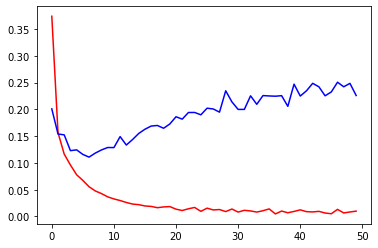

In [84]:
# loss(학습데이터의 로스)와 val_loss(검증데이터의 로스) 비교
plt.plot(history.history['loss'], c='r')
plt.plot(history.history['val_loss'], c='b')
plt.show()

In [85]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 789us/step - loss: 0.2232 - acc: 0.9707


[0.22315539419651031, 0.9707000255584717]

In [95]:
# 혼동행렬(confusion matrix)
from sklearn.metrics import confusion_matrix
pred = model.predict(test_x)
confusion_matrix(np.argmax(test_y, axis=1), np.argmax(pred, axis=1))

313/313 [==============================] - 0s 644us/step


array([[ 968,    0,    2,    2,    0,    1,    2,    2,    3,    0],
       [   0, 1124,    1,    2,    0,    1,    1,    1,    5,    0],
       [   2,    1, 1007,   10,    1,    0,    1,    4,    5,    1],
       [   0,    0,    9,  986,    0,    2,    0,    4,    7,    2],
       [   4,    0,    5,    0,  936,    3,    7,    2,    1,   24],
       [   2,    1,    0,   18,    1,  854,    8,    1,    5,    2],
       [  11,    3,    2,    1,    5,    5,  928,    0,    3,    0],
       [   1,    2,   11,    2,    4,    1,    0,  992,    4,   11],
       [   3,    0,    8,    8,    3,    1,    5,    6,  935,    5],
       [   2,    3,    1,   11,    8,    4,    0,    3,    0,  977]],
      dtype=int64)

In [91]:
pred[0]

array([1.3006688e-14, 1.6864660e-13, 5.7207791e-17, 9.7595404e-12,
       1.0986964e-21, 9.9569936e-14, 2.7116116e-30, 9.9999976e-01,
       7.0303979e-14, 2.6590533e-07], dtype=float32)

In [94]:
test_y[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [93]:
import numpy as np
np.argmax(pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [96]:
# 분류보고서
from sklearn.metrics import classification_report
print(classification_report(np.argmax(test_y, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.98      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

